# Preprocessing and Dataset Testing

In [2]:
# Setup
# Configure the Python path to import project modules
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# Import required libraries for data processing and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from tqdm import tqdm

# Import custom modules for data loading, preprocessing, and dataset creation
from src.data.data_loader import TeacherDataLoader, DatasetConfig
from src.data.preprocessor import (
    ReasoningPreprocessor,
    PreprocessConfig,
    TaskFormatter
)
from src.data.dataset import (
    ESNLIDataset,
    create_dataloaders
)

# Configure visualization styling
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Enable autoreload for automatic module reloading during development
%load_ext autoreload
%autoreload 2


## 1. Test TaskFormatter
Verify that prompts are correctly formatted for both NLI and instruction tasks.

In [3]:
# Initialize the task formatter
formatter = TaskFormatter()

# Test NLI (Natural Language Inference) formatting
# This tests how the formatter creates prompts for NLI tasks
print("=" * 70)
print("NLI TASK FORMATTING")
print("=" * 70)

# Define a sample NLI example with premise, hypothesis, label, and explanation
premise = "A person on a horse jumps over a broken down airplane."
hypothesis = "A person is training his horse for a competition."
label = 1  # neutral (0=entailment, 1=neutral, 2=contradiction)
explanation = "The person is not necessarily training his horse."

# Format the NLI sample into source (input) and target (output) texts
source, target = formatter.format_nli(premise, hypothesis, label, explanation)

# Display the formatted prompts and their statistics
print(f"\nSource (Input):\n{source}")
print(f"\nTarget (Output):\n{target}")
print(f"\nSource length: {len(source.split())} words")
if target:
    print(f"Target length: {len(target.split())} words")
else:
    print("Target length: 0 words (None)")


NLI TASK FORMATTING

Source (Input):
nli premise: A person on a horse jumps over a broken down airplane. hypothesis: A person is training his horse for a competition.

Target (Output):
neutral explanation: The person is not necessarily training his horse.

Source length: 23 words
Target length: 10 words


## 2. Test ReasoningPreprocessor
Test tokenization and encoding for FLAN-T5.

In [4]:
# Initialize the reasoning preprocessor with configuration
# This handles tokenization and encoding for FLAN-T5 model
config = PreprocessConfig(
    model_name="google/flan-t5-base",  # Use FLAN-T5 base model tokenizer
    max_source_length=256,              # Maximum input sequence length
    max_target_length=128,              # Maximum output sequence length
    padding="max_length"                # Pad sequences to max length
)

preprocessor = ReasoningPreprocessor(config)

# Display information about the loaded tokenizer
print("=" * 70)
print("TOKENIZER INFORMATION")
print("=" * 70)
print(preprocessor.get_tokenizer_info())

INFO:src.data.preprocessor:Loading tokenizer: google/flan-t5-base
INFO:httpx:HTTP Request: HEAD https://huggingface.co/google/flan-t5-base/resolve/main/config.json "HTTP/1.1 307 Temporary Redirect"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/api/resolve-cache/models/google/flan-t5-base/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/config.json "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://huggingface.co/api/resolve-cache/models/google/flan-t5-base/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/config.json "HTTP/1.1 200 OK"


config.json: 0.00B [00:00, ?B/s]

INFO:httpx:HTTP Request: HEAD https://huggingface.co/google/flan-t5-base/resolve/main/tokenizer_config.json "HTTP/1.1 307 Temporary Redirect"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/api/resolve-cache/models/google/flan-t5-base/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/tokenizer_config.json "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://huggingface.co/api/resolve-cache/models/google/flan-t5-base/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/tokenizer_config.json "HTTP/1.1 200 OK"


tokenizer_config.json: 0.00B [00:00, ?B/s]

INFO:httpx:HTTP Request: GET https://huggingface.co/api/models/google/flan-t5-base/tree/main/additional_chat_templates?recursive=false&expand=false "HTTP/1.1 404 Not Found"
INFO:httpx:HTTP Request: GET https://huggingface.co/api/models/google/flan-t5-base/tree/main?recursive=true&expand=false "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/google/flan-t5-base/resolve/main/spiece.model "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: GET https://huggingface.co/api/models/google/flan-t5-base/xet-read-token/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2 "HTTP/1.1 200 OK"


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

INFO:httpx:HTTP Request: HEAD https://huggingface.co/google/flan-t5-base/resolve/main/tokenizer.json "HTTP/1.1 307 Temporary Redirect"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/api/resolve-cache/models/google/flan-t5-base/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/tokenizer.json "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://huggingface.co/api/resolve-cache/models/google/flan-t5-base/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/tokenizer.json "HTTP/1.1 200 OK"


tokenizer.json: 0.00B [00:00, ?B/s]

INFO:httpx:HTTP Request: HEAD https://huggingface.co/google/flan-t5-base/resolve/main/added_tokens.json "HTTP/1.1 404 Not Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/google/flan-t5-base/resolve/main/special_tokens_map.json "HTTP/1.1 307 Temporary Redirect"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/api/resolve-cache/models/google/flan-t5-base/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/special_tokens_map.json "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://huggingface.co/api/resolve-cache/models/google/flan-t5-base/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/special_tokens_map.json "HTTP/1.1 200 OK"


special_tokens_map.json: 0.00B [00:00, ?B/s]

INFO:httpx:HTTP Request: HEAD https://huggingface.co/google/flan-t5-base/resolve/main/chat_template.jinja "HTTP/1.1 404 Not Found"


TOKENIZER INFORMATION
{'model_name': 'google/flan-t5-base', 'vocab_size': 32100, 'max_source_length': 256, 'max_target_length': 128, 'pad_token': '<pad>', 'pad_token_id': 0, 'eos_token': '</s>', 'eos_token_id': 1}


In [5]:
# Test tokenization on an e-SNLI sample
# This verifies that the preprocessor correctly tokenizes NLI examples
print("\n" + "=" * 70)
print("TOKENIZING e-SNLI SAMPLE")
print("=" * 70)

esnli_sample = {
    'premise': "A person on a horse jumps over a broken down airplane.",
    'hypothesis': "A person is training his horse for a competition.",
    'label': 1,  # neutral
    'explanation_1': "The person is not necessarily training his horse."
}

print("\nOriginal Sample:")
print(f"Premise: {esnli_sample['premise']}")
print(f"Hypothesis: {esnli_sample['hypothesis']}")
print(f"Label: {esnli_sample['label']} (neutral)")
print(f"Explanation: {esnli_sample['explanation_1']}")

# ============================================================================
# TOKENIZATION PROCESS
# ============================================================================
# The preprocessor will:
# 1. Format the sample into a prompt (using TaskFormatter)
# 2. Tokenize both input (source) and output (target) using T5 tokenizer
# 3. Convert text into numerical IDs that the model can process
# 4. Create attention masks (which tokens to pay attention to)
# 5. Create labels for training (what the model should predict)

print("\n" + "=" * 70)
print("STEP 1: TOKENIZE THE SAMPLE")
print("=" * 70)

tokenized = preprocessor.preprocess_esnli_sample(esnli_sample)

# ============================================================================
# UNDERSTANDING THE OUTPUT TENSORS
# ============================================================================
# input_ids: The numerical representation of the input text
#            Each number corresponds to a token in the vocabulary
# attention_mask: Binary mask (1=real token, 0=padding)
#                 Tells the model which tokens to attend to
# labels: The numerical representation of the target/output text
#         Uses -100 for padding

print("\nTokenized Tensor Shapes:")
print(f"Input IDs:       {tokenized['input_ids'].shape}       → {tokenized['input_ids'].shape[0]} tokens for input")
print(f"Attention Mask:  {tokenized['attention_mask'].shape}  → {tokenized['attention_mask'].shape[0]} mask values")
print(f"Labels:          {tokenized['labels'].shape}          → {tokenized['labels'].shape[0]} tokens for output")

# ============================================================================
print("\n" + "=" * 70)
print("STEP 2: EXAMINE INPUT TOKENS (MODEL INPUT)")
print("=" * 70)

# Show the first 20 token IDs
# These are numerical representations of the input prompt
input_token_ids = tokenized['input_ids'][:20].tolist()
print(f"\nFirst 20 Input Token IDs:")
print(input_token_ids)

# Decode these IDs back to see what they represent
print(f"\nWhat these IDs mean (decoded one by one):")
for i, token_id in enumerate(input_token_ids[:10]):  # Show first 10 for clarity
    token_text = preprocessor.tokenizer.decode([token_id])
    print(f"  Token {i}: ID={token_id:5d} → '{token_text}'")

# Decode the full input to see the complete formatted prompt
print(f"\nFull Decoded Input:")
decoded_input = preprocessor.decode_prediction(tokenized['input_ids'])
print(decoded_input)
print(f"\nThis is what the model sees as input!")

# ============================================================================
# EXAMINING ATTENTION MASK
# ============================================================================
print("\n" + "=" * 70)
print("STEP 3: EXAMINE ATTENTION MASK")
print("=" * 70)

attention_values = tokenized['attention_mask'][:30].tolist()
print(f"\nFirst 30 Attention Mask Values:")
print(attention_values)

# Count real tokens vs padding
num_real_tokens = tokenized['attention_mask'].sum().item()
num_padding = len(tokenized['attention_mask']) - num_real_tokens
print(f"\nAttention Statistics:")
print(f"  Real tokens (1):  {num_real_tokens}")
print(f"  Padding (0):      {num_padding}")
print(f"  Total:            {len(tokenized['attention_mask'])}")
print(f"\nThe model only processes the first {num_real_tokens} tokens, ignoring the rest!")

# ============================================================================
# EXAMINING LABEL TOKENS (What the model should OUTPUT)
# ============================================================================
print("\n" + "=" * 70)
print("STEP 4: EXAMINE LABEL TOKENS (MODEL OUTPUT/TARGET)")
print("=" * 70)

# Show the first 20 label token IDs
# -100 is a special value
label_token_ids = tokenized['labels'][:20].tolist()
print(f"\nFirst 20 Label Token IDs:")
print(label_token_ids)

# Count real labels vs padding (-100)
num_real_labels = (tokenized['labels'] != -100).sum().item()
num_padding_labels = (tokenized['labels'] == -100).sum().item()
print(f"\nLabel Statistics:")
print(f"  Real label tokens:  {num_real_labels}")
print(f"  Padding (-100):     {num_padding_labels}")
print(f"  Total:              {len(tokenized['labels'])}")

# Decode labels to see what the model should predict
# We need to replace -100 with the actual pad token ID for decoding
print(f"\nWhat these label IDs mean (first 10 non-padding):")
non_padding_labels = tokenized['labels'][tokenized['labels'] != -100][:10]
for i, token_id in enumerate(non_padding_labels.tolist()):
    token_text = preprocessor.tokenizer.decode([token_id])
    print(f"  Token {i}: ID={token_id:5d} → '{token_text}'")

print(f"\nFull Decoded Labels (What model should predict):")
labels_for_decode = tokenized['labels'].clone()
labels_for_decode[labels_for_decode == -100] = preprocessor.tokenizer.pad_token_id
decoded_labels = preprocessor.decode_prediction(labels_for_decode)
print(decoded_labels)
print(f"\nThis is what we want the model to generate!")

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "=" * 70)
print("TOKENIZATION SUMMARY")
print("=" * 70)
print("\nThe preprocessor has:")
print(f"  1. Formatted the NLI task into a text prompt")
print(f"  2. Converted input text → {num_real_tokens} numerical tokens")
print(f"  3. Converted output text → {num_real_labels} numerical tokens")
print(f"  4. Added padding to reach max lengths ({config.max_source_length}/{config.max_target_length})")
print(f"  5. Created attention masks to ignore padding")
print(f"\nTraining objective:")
print(f"  Given INPUT:  {decoded_input[:100]}...")
print(f"  Predict:      {decoded_labels}")


TOKENIZING e-SNLI SAMPLE

Original Sample:
Premise: A person on a horse jumps over a broken down airplane.
Hypothesis: A person is training his horse for a competition.
Label: 1 (neutral)
Explanation: The person is not necessarily training his horse.

STEP 1: TOKENIZE THE SAMPLE

Tokenized Tensor Shapes:
Input IDs:       torch.Size([256])       → 256 tokens for input
Attention Mask:  torch.Size([256])  → 256 mask values
Labels:          torch.Size([128])          → 128 tokens for output

STEP 2: EXAMINE INPUT TOKENS (MODEL INPUT)

First 20 Input Token IDs:
[3, 29, 40, 23, 3, 17398, 10, 71, 568, 30, 3, 9, 4952, 4418, 7, 147, 3, 9, 4335, 323]

What these IDs mean (decoded one by one):
  Token 0: ID=    3 → ''
  Token 1: ID=   29 → 'n'
  Token 2: ID=   40 → 'l'
  Token 3: ID=   23 → 'i'
  Token 4: ID=    3 → ''
  Token 5: ID=17398 → 'premise'
  Token 6: ID=   10 → ':'
  Token 7: ID=   71 → 'A'
  Token 8: ID=  568 → 'person'
  Token 9: ID=   30 → 'on'

Full Decoded Input:
nli premise: A p


ATTENTION MASK VISUALIZATION

Actual content tokens: 36 / 256
Padding tokens: 220


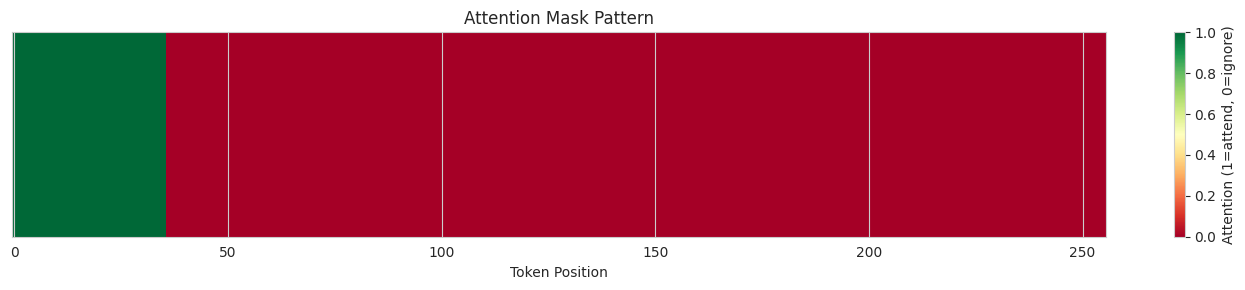

In [6]:
# Visualize the attention mask
# This shows which tokens the model should attend to (1) and which to ignore (0)
print("\n" + "=" * 70)
print("ATTENTION MASK VISUALIZATION")
print("=" * 70)

# Convert tensors to numpy for visualization
attention_mask = tokenized['attention_mask'].numpy()
input_ids = tokenized['input_ids'].numpy()

# Calculate how many tokens are actual content vs padding
content_length = attention_mask.sum()
print(f"\nActual content tokens: {content_length} / {len(attention_mask)}")
print(f"Padding tokens: {len(attention_mask) - content_length}")

# Create a heatmap visualization of the attention mask
plt.figure(figsize=(14, 3))
plt.imshow(attention_mask.reshape(1, -1), cmap='RdYlGn', aspect='auto')
plt.colorbar(label='Attention (1=attend, 0=ignore)')
plt.xlabel('Token Position')
plt.yticks([])
plt.title('Attention Mask Pattern')
plt.tight_layout()
plt.show()


## 3. Load Real Data and Create Datasets

In [7]:
# Load small subsets of e-SNLI data for testing
# Using small subsets makes testing faster during development
print("Loading data...")
loader = TeacherDataLoader()

# Load the full e-SNLI dataset from HuggingFace
esnli_full = loader.load_esnli()

# Select small subsets for quick testing
esnli_train_small = esnli_full['train'].select(range(100))  # First 100 training samples
esnli_val_small = esnli_full['validation'].select(range(50))  # First 50 validation samples

print(f"Loaded {len(esnli_train_small)} e-SNLI train samples")
print(f"Loaded {len(esnli_val_small)} e-SNLI val samples")

INFO:src.data.data_loader:Loading e-SNLI dataset from GitHub (OanaMariaCamburu/e-SNLI)...


Loading data...


INFO:httpx:HTTP Request: HEAD https://s3.amazonaws.com/datasets.huggingface.co/datasets/datasets/csv/csv.py "HTTP/1.1 200 OK"


Generating train split: 0 examples [00:00, ? examples/s]

INFO:httpx:HTTP Request: HEAD https://s3.amazonaws.com/datasets.huggingface.co/datasets/datasets/csv/csv.py "HTTP/1.1 200 OK"


Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/259999 [00:00<?, ? examples/s]

Map:   0%|          | 0/289368 [00:00<?, ? examples/s]

INFO:httpx:HTTP Request: HEAD https://s3.amazonaws.com/datasets.huggingface.co/datasets/datasets/csv/csv.py "HTTP/1.1 200 OK"


Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/9842 [00:00<?, ? examples/s]

INFO:httpx:HTTP Request: HEAD https://s3.amazonaws.com/datasets.huggingface.co/datasets/datasets/csv/csv.py "HTTP/1.1 200 OK"


Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/9824 [00:00<?, ? examples/s]

INFO:src.data.data_loader:Loaded e-SNLI: train=549367, val=9842, test=9824
INFO:src.data.data_loader:e-SNLI loaded successfully. Splits: ['train', 'validation', 'test']
INFO:src.data.data_loader:Sample counts: [('train', 549367), ('validation', 9842), ('test', 9824)]


Loaded 100 e-SNLI train samples
Loaded 50 e-SNLI val samples


In [8]:
# Create PyTorch datasets from the loaded data
# These datasets handle tokenization and caching for efficient data loading
print("\n" + "=" * 70)
print("CREATING PYTORCH DATASETS")
print("=" * 70)

# Initialize preprocessor with configuration
preprocess_config = PreprocessConfig(
    model_name="google/flan-t5-base",
    max_source_length=256,
    max_target_length=128
)
preprocessor = ReasoningPreprocessor(preprocess_config)

# Create training dataset with caching enabled
esnli_train_dataset = ESNLIDataset(
    esnli_train_small,
    preprocessor,
    cache_dir="../data/cache/esnli_train",  # Cache directory for faster reloading
    use_cache=True                           # Enable caching
)

# Create validation dataset with caching enabled
esnli_val_dataset = ESNLIDataset(
    esnli_val_small,
    preprocessor,
    cache_dir="../data/cache/esnli_val",
    use_cache=True
)

print(f"\ne-SNLI train dataset: {len(esnli_train_dataset)} samples")
print(f"e-SNLI val dataset: {len(esnli_val_dataset)} samples")


INFO:src.data.preprocessor:Loading tokenizer: google/flan-t5-base



CREATING PYTORCH DATASETS


INFO:httpx:HTTP Request: HEAD https://huggingface.co/google/flan-t5-base/resolve/main/config.json "HTTP/1.1 307 Temporary Redirect"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/api/resolve-cache/models/google/flan-t5-base/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/config.json "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/google/flan-t5-base/resolve/main/tokenizer_config.json "HTTP/1.1 307 Temporary Redirect"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/api/resolve-cache/models/google/flan-t5-base/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/tokenizer_config.json "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://huggingface.co/api/models/google/flan-t5-base/tree/main/additional_chat_templates?recursive=false&expand=false "HTTP/1.1 404 Not Found"
INFO:httpx:HTTP Request: GET https://huggingface.co/api/models/google/flan-t5-base/tree/main?recursive=true&expand=false "HTTP/1.1 200 OK"
INFO:src.data.dataset:Initialized ESNLIDataset with 100 samples
IN


e-SNLI train dataset: 100 samples
e-SNLI val dataset: 50 samples


In [9]:
# Test dataset indexing
# Verify that we can access individual samples from the dataset
print("\n" + "=" * 70)
print("TESTING DATASET INDEXING")
print("=" * 70)

# Get the first sample from the training dataset
sample_idx = 0
esnli_sample = esnli_train_dataset[sample_idx]

# Display the structure of a dataset sample
print(f"\nSample keys: {esnli_sample.keys()}")
print(f"\nShapes:")
for key, value in esnli_sample.items():
    print(f"  {key}: {value.shape}")

# Decode the tokenized sample to verify it's correct
print(f"\n--- Decoded Sample ---")
decoded_input = preprocessor.decode_prediction(esnli_sample['input_ids'])
print(f"Input: {decoded_input}")

# Decode labels (replace -100 padding with pad token)
labels_for_decode = esnli_sample['labels'].clone()
labels_for_decode[labels_for_decode == -100] = preprocessor.tokenizer.pad_token_id
decoded_target = preprocessor.decode_prediction(labels_for_decode)
print(f"Target: {decoded_target}")

# Show the original raw data before preprocessing
raw = esnli_train_dataset.get_raw_sample(sample_idx)
print(f"\n--- Raw Sample ---")
print(f"Premise: {raw['premise']}")
print(f"Hypothesis: {raw['hypothesis']}")
print(f"Label: {raw['label']}")



TESTING DATASET INDEXING

Sample keys: dict_keys(['input_ids', 'attention_mask', 'labels'])

Shapes:
  input_ids: torch.Size([256])
  attention_mask: torch.Size([256])
  labels: torch.Size([128])

--- Decoded Sample ---
Input: nli premise: A person on a horse jumps over a broken down airplane. hypothesis: A person is training his horse for a competition.
Target: neutral explanation: the person is not necessarily training his horse

--- Raw Sample ---
Premise: A person on a horse jumps over a broken down airplane.
Hypothesis: A person is training his horse for a competition.
Label: 1


## 5. Test DataLoader Creation

In [10]:
# Create DataLoaders for batch training
# DataLoaders handle batching, shuffling, and parallel data loading
print("=" * 70)
print("CREATING DATALOADERS")
print("=" * 70)

batch_size = 8  # Number of samples per batch

# Create train and validation dataloaders
train_loader, val_loader = create_dataloaders(
    train_dataset=esnli_train_dataset,
    val_dataset=esnli_val_dataset,
    batch_size=batch_size,
    num_workers=0,  # Use 0 for notebook compatibility (no multiprocessing)
    pad_token_id=preprocessor.tokenizer.pad_token_id,
    shuffle_train=True  # Shuffle training data for better learning
)

print(f"\nTrain DataLoader: {len(train_loader)} batches")
print(f"Val DataLoader: {len(val_loader)} batches")
print(f"\nBatch size: {batch_size}")
print(f"Total train samples: {len(train_loader) * batch_size}")
print(f"Total val samples: {len(val_loader) * batch_size}")


CREATING DATALOADERS

Train DataLoader: 13 batches
Val DataLoader: 7 batches

Batch size: 8
Total train samples: 104
Total val samples: 56


In [11]:
# Test batch iteration
# Verify that batches are correctly formed and have the expected structure
print("\n" + "=" * 70)
print("TESTING BATCH ITERATION")
print("=" * 70)

# Get the first batch from the training dataloader
batch = next(iter(train_loader))

# Display batch structure
print(f"\nBatch keys: {batch.keys()}")
print(f"\nBatch shapes:")
for key, value in batch.items():
    print(f"  {key}: {value.shape}")

# Verify batch dimensions are correct
assert batch['input_ids'].shape[0] == batch_size, "Batch size mismatch!"
assert batch['input_ids'].shape[1] == config.max_source_length, "Sequence length mismatch!"
print(f"\nBatch dimensions correct!")

# Check tensor properties
print(f"\nTensor device: {batch['input_ids'].device}")
print(f"Tensor dtype: {batch['input_ids'].dtype}")



TESTING BATCH ITERATION

Batch keys: dict_keys(['input_ids', 'attention_mask', 'labels'])

Batch shapes:
  input_ids: torch.Size([8, 256])
  attention_mask: torch.Size([8, 256])
  labels: torch.Size([8, 128])

Batch dimensions correct!

Tensor device: cpu
Tensor dtype: torch.int64


In [12]:
# Display decoded samples from the batch
# This helps verify that batching hasn't corrupted the data
print("\n" + "=" * 70)
print("BATCH SAMPLES PREVIEW")
print("=" * 70)

n_display = 3  # Number of samples to display

# Loop through first few samples in the batch
for i in range(min(n_display, batch_size)):
    print(f"\n--- Sample {i+1} ---")
    
    # Decode input sequence
    input_text = preprocessor.decode_prediction(batch['input_ids'][i])
    print(f"Input: {input_text}")
    
    # Decode target sequence (replace -100 padding)
    labels = batch['labels'][i].clone()
    labels[labels == -100] = preprocessor.tokenizer.pad_token_id
    target_text = preprocessor.decode_prediction(labels)
    print(f"Target: {target_text}")



BATCH SAMPLES PREVIEW

--- Sample 1 ---
Input: nli premise: A person on a horse jumps over a broken down airplane. hypothesis: A person is training his horse for a competition.
Target: neutral explanation: the person is not necessarily training his horse

--- Sample 2 ---
Input: nli premise: Two adults, one female in white, with shades and one male, gray clothes, walking across a street, away from a eatery with a blurred image of a dark colored red shirted person in the foreground. hypothesis: Two people walk home after a tasty steak dinner.
Target: neutral explanation: The individuals walking away from the restaurant had no particular destination. Now it is clear that they are going home. The restaurant could have been any type of food. It was not clear what time of day the meal took place but dinner implies evening.

--- Sample 3 ---
Input: nli premise: A boy is jumping on skateboard in the middle of a red bridge. hypothesis: The boy does a skateboarding trick.
Target: entailment ex

## 6. Performance Analysis

In [13]:
# Measure preprocessing speed and caching effectiveness
# This helps evaluate the performance benefits of caching
import time

print("=" * 70)
print("PREPROCESSING PERFORMANCE")
print("=" * 70)

# Test with caching enabled
n_iterations = 3  # Run multiple iterations to see cache speedup

print("\n--- With Caching ---")
times_cached = []

# Run multiple iterations to measure cache performance
for iteration in range(n_iterations):
    start = time.time()
    
    # Access 50 samples from the dataset
    for i in range(50):
        _ = esnli_train_dataset[i]
    
    elapsed = time.time() - start
    times_cached.append(elapsed)
    print(f"Iteration {iteration+1}: {elapsed:.3f}s ({50/elapsed:.1f} samples/sec)")

# Calculate average performance and speedup from caching
print(f"\nAverage: {np.mean(times_cached):.3f}s")
print(f"Speedup (iter 2 vs iter 1): {times_cached[0]/times_cached[1]:.2f}x")


PREPROCESSING PERFORMANCE

--- With Caching ---
Iteration 1: 0.030s (1687.1 samples/sec)
Iteration 2: 0.000s (5991862.9 samples/sec)
Iteration 3: 0.000s (7231558.6 samples/sec)

Average: 0.010s
Speedup (iter 2 vs iter 1): 3551.54x



TOKEN LENGTH DISTRIBUTION


Analyzing lengths: 100%|██████████| 100/100 [00:00<00:00, 2974.11it/s]


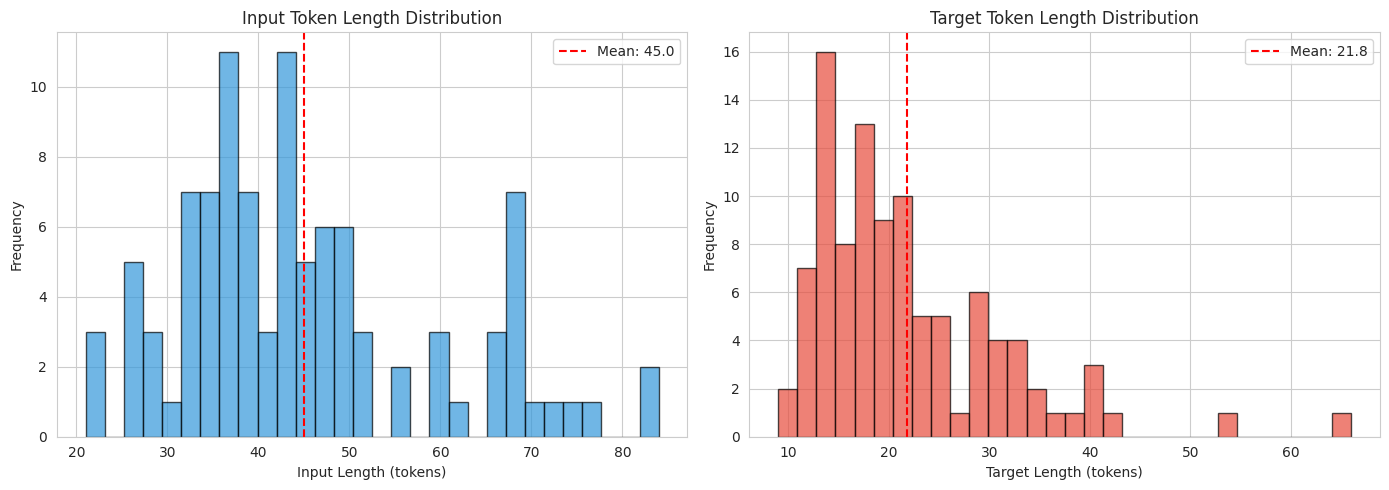


Input lengths - Mean: 45.0, Std: 14.2
Target lengths - Mean: 21.8, Std: 9.5

Max configured lengths: Input=256, Target=128


In [14]:
# Analyze token length distribution
# This helps understand if our max_length settings are appropriate
print("\n" + "=" * 70)
print("TOKEN LENGTH DISTRIBUTION")
print("=" * 70)

input_lengths = []
label_lengths = []

# Iterate through dataset and collect token lengths
for i in tqdm(range(len(esnli_train_dataset)), desc="Analyzing lengths"):
    sample = esnli_train_dataset[i]
    
    # Count non-padding tokens for input and labels
    input_len = sample['attention_mask'].sum().item()
    label_len = (sample['labels'] != -100).sum().item()
    
    input_lengths.append(input_len)
    label_lengths.append(label_len)

# Create histograms to visualize token length distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot input length distribution
axes[0].hist(input_lengths, bins=30, color='#3498db', alpha=0.7, edgecolor='black')
axes[0].axvline(np.mean(input_lengths), color='red', linestyle='--', 
                label=f'Mean: {np.mean(input_lengths):.1f}')
axes[0].set_xlabel('Input Length (tokens)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Input Token Length Distribution')
axes[0].legend()

# Plot target length distribution
axes[1].hist(label_lengths, bins=30, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].axvline(np.mean(label_lengths), color='red', linestyle='--',
                label=f'Mean: {np.mean(label_lengths):.1f}')
axes[1].set_xlabel('Target Length (tokens)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Target Token Length Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print statistics about token lengths
print(f"\nInput lengths - Mean: {np.mean(input_lengths):.1f}, Std: {np.std(input_lengths):.1f}")
print(f"Target lengths - Mean: {np.mean(label_lengths):.1f}, Std: {np.std(label_lengths):.1f}")
print(f"\nMax configured lengths: Input={config.max_source_length}, Target={config.max_target_length}")


## 7. Test Extraction Functions

In [15]:
# Test label and explanation extraction from predictions
# These functions parse model outputs to extract labels and explanations
print("=" * 70)
print("TESTING PREDICTION PARSING")
print("=" * 70)

# Create test predictions in different formats
test_predictions = [
    "entailment explanation: The person is definitely on a horse.",
    "neutral explanation: We cannot determine if they are training.",
    "contradiction",
    "entailment This clearly follows from the premise."
]

# Test extraction functions on each prediction
for pred in test_predictions:
    print(f"\nPrediction: {pred}")
    
    # Extract the predicted label (entailment/neutral/contradiction)
    label = preprocessor.extract_label_from_prediction(pred)
    # Extract the explanation text
    explanation = preprocessor.extract_explanation_from_prediction(pred)
    
    print(f"  → Label: {label}")
    print(f"  → Explanation: {explanation}")


TESTING PREDICTION PARSING

Prediction: entailment explanation: The person is definitely on a horse.
  → Label: entailment
  → Explanation: the person is definitely on a horse.

Prediction: neutral explanation: We cannot determine if they are training.
  → Label: neutral
  → Explanation: we cannot determine if they are training.

Prediction: contradiction
  → Label: contradiction
  → Explanation: 

Prediction: entailment This clearly follows from the premise.
  → Label: entailment
  → Explanation: This clearly follows from the premise.


## 8. Summary and Validation

In [16]:
# Display comprehensive summary of all tests performed
# This provides a final validation that all components are working correctly
print("\n" + "=" * 70)
print("PREPROCESSING PIPELINE SUMMARY")
print("=" * 70)

print("\nTaskFormatter")
print("  • NLI tasks formatted correctly")
print("  • Instruction tasks formatted correctly")

print("\nReasoningPreprocessor")
print(f"  • Tokenizer loaded: {preprocessor.config.model_name}")
print(f"  • Max source length: {preprocessor.config.max_source_length}")
print(f"  • Max target length: {preprocessor.config.max_target_length}")
print("  • Tokenization working correctly")
print("  • Padding/truncation working")

print("\nPyTorch Datasets")
print(f"  • e-SNLI train: {len(esnli_train_dataset)} samples")
print(f"  • e-SNLI val: {len(esnli_val_dataset)} samples")
print("  • Caching working correctly")

print("\nDataLoaders")
print(f"  • Train batches: {len(train_loader)}")
print(f"  • Val batches: {len(val_loader)}")
print(f"  • Batch size: {batch_size}")
print("  • Collation working correctly")

print("\nPerformance")
print(f"  • Average preprocessing time: {np.mean(times_cached[1:]):.3f}s per 50 samples")
print(f"  • Caching speedup: ~{times_cached[0]/np.mean(times_cached[1:]):.1f}x")
print(f"  • Average input tokens: {np.mean(input_lengths):.1f}")
print(f"  • Average target tokens: {np.mean(label_lengths):.1f}")



PREPROCESSING PIPELINE SUMMARY

TaskFormatter
  • NLI tasks formatted correctly
  • Instruction tasks formatted correctly

ReasoningPreprocessor
  • Tokenizer loaded: google/flan-t5-base
  • Max source length: 256
  • Max target length: 128
  • Tokenization working correctly
  • Padding/truncation working

PyTorch Datasets
  • e-SNLI train: 100 samples
  • e-SNLI val: 50 samples
  • Caching working correctly

DataLoaders
  • Train batches: 13
  • Val batches: 7
  • Batch size: 8
  • Collation working correctly

Performance
  • Average preprocessing time: 0.000s per 50 samples
  • Caching speedup: ~3884.5x
  • Average input tokens: 45.0
  • Average target tokens: 21.8
